In [42]:
!pip install matplotlib

  Using cached matplotlib-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 4.6 MB/s eta 0:00:0000:0100:010m
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (310 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)


In [58]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import matplotlib.pyplot as plt

# Read the text file
with open('../training_metrics_v5.log', 'r') as file:
    lines = file.readlines()

epochs, wer_values, loss_values = [], [], []
for line in lines:
    if 'Epoch' in line:
        try:
            epoch, wer, loss = map(str.strip, line.split('|'))
            epochs.append(int(epoch.split()[1])); wer_values.append(float(wer.split()[1])); loss_values.append(float(loss.split()[1]))
        except ValueError as e:
            print(e)
            print(f"Skipped invalid line: {line}")

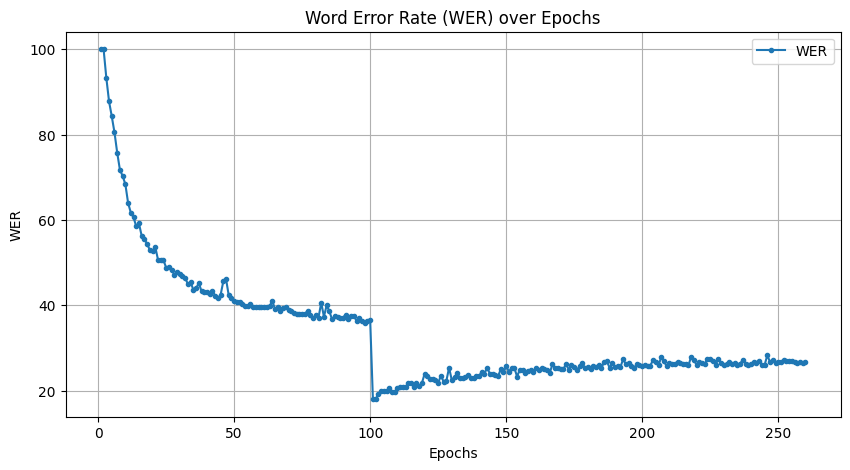

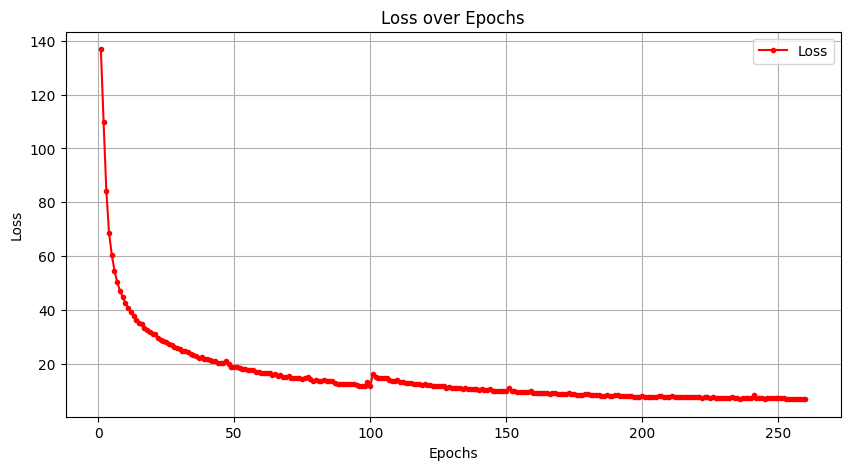

In [59]:
# Plot WER
plt.figure(figsize=(10, 5))
plt.plot(epochs, wer_values, label='WER', marker='.')
plt.title('Word Error Rate (WER) over Epochs')
plt.xlabel('Epochs')
plt.ylabel('WER')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, label='Loss', marker='.', color='r')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
def get_latest_checkpoint(directory="../models/", pattern=None):
    # Get all filenames in the directory
    import os, re
    filenames = os.listdir(directory)
    #print(filenames)
    # Filter filenames based on the pattern
    if pattern:
        filenames = [filename for filename in filenames if pattern in filename]

    # Define a regular expression pattern to extract numbers
    num_pattern = re.compile(r'\((\d+)\)')

    # Extract numbers from each filename and store in a list
    numbers = [int(re.search(num_pattern, filename).group(1)) for filename in filenames if re.search(num_pattern, filename)]

    # Find the maximum number
    latest_checkpoint = max(numbers, default=1)
   # print(numbers)
    return latest_checkpoint



# Example usage:
# model_checkpoint_path_v4 = f"../models/model_checkpoint_v4_({last_epoch}).keras"
# model_checkpoint_path_v5 = f"../models/model_checkpoint_v5_({last_epoch}).keras"

last_epoch_v4 = get_latest_checkpoint( pattern="v4")
last_epoch_v5 = get_latest_checkpoint( pattern="5v")
print(last_epoch_v4)

print(last_epoch_v5)

136
260


In [5]:
max([])

ValueError: max() arg is an empty sequence

In [11]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from load_dataset import Load_Data
from preprocess import Preporcess_Data
from model import build_model
from utils import CallbackEval,CTCLoss
from jiwer import wer
import time
from datetime import datetime

print("="*100)
start_time = time.time()

start_date_time = datetime.now()
print("Model started Training on this Date and time below")
# Print the start date and time
print(start_date_time.strftime("%Y-%m-%d %H:%M:%S"))
print()
print("-"*80)


Model started Training on this Date and time below
2023-12-29 10:57:50

--------------------------------------------------------------------------------


In [12]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

# tf.get_logger().setLevel('ERROR')

# Define file paths for model checkpoints
model_checkpoint_path = "../models/model_checkpoint_v4_(103).keras"
# Define the number of epochs. HISTORY - 30 DONE

last_epoch = 31
new_train_epoch = 80
epochs = last_epoch + new_train_epoch 
batch_size = 8 #16 #32

In [13]:
load_data = Load_Data()

The loaded vocabulary is: ['', 'ۂ', 'غ', 'ك', 'ظ', 'س', 'ے', 'ھ', 'ﷺ', 'ﮯ', 'ب', 'ٹ', 'پ', 'ا', 'چ', 'ﺘ', 'ذ', 'ض', 'ژ', 'ۓ', 'ر', 'ث', 'ﭨ', 'خ', 'ڈ', 'ط', 'ک', 'ء', 'آ', 'ۃ', 'ش', 'ع', ' ', 'ﻮ', 'م', 'ى', 'أ', 'ی', 'ق', 'ﺗ', 'ن', '!', 'ں', 'ڑ', 'ﮭ', 'گ', 'ت', 'د', 'ﺩ', 'ف', "'", 'ح', 'ل', 'ج', 'و', 'ﻧ', 'ﷲ', 'ه', 'ي', 'ہ', 'ؤ', 'ز', 'ﺲ', 'ص', 'ﯾ', 'ئ'] (size =66)
The loaded vocabulary is: ['', 'ۂ', 'غ', 'ك', 'ظ', 'س', 'ے', 'ھ', 'ﷺ', 'ﮯ', 'ب', 'ٹ', 'پ', 'ا', 'چ', 'ﺘ', 'ذ', 'ض', 'ژ', 'ۓ', 'ر', 'ث', 'ﭨ', 'خ', 'ڈ', 'ط', 'ک', 'ء', 'آ', 'ۃ', 'ش', 'ع', ' ', 'ﻮ', 'م', 'ى', 'أ', 'ی', 'ق', 'ﺗ', 'ن', '!', 'ں', 'ڑ', 'ﮭ', 'گ', 'ت', 'د', 'ﺩ', 'ف', "'", 'ح', 'ل', 'ج', 'و', 'ﻧ', 'ﷲ', 'ه', 'ي', 'ہ', 'ؤ', 'ز', 'ﺲ', 'ص', 'ﯾ', 'ئ'] (size =66)
Size of the training set: 59815
Size of the training set: 6647


2023-12-29 10:58:40.692879: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3427 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-12-29 10:58:40.693469: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 3398 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:02:00.0, compute capability: 8.6


In [14]:
print(f"""
model_checkpoint_path = {model_checkpoint_path}
last_epoch = {last_epoch}
new_train_epoch = {new_train_epoch}
epochs = {epochs}
batch_size = {batch_size}
""")


model_checkpoint_path = ../models/model_checkpoint_v4_(103).keras
last_epoch = 31
new_train_epoch = 80
epochs = 111
batch_size = 8



In [15]:
char_to_num= load_data.char_to_num
char_to_num

In [16]:
num_to_char  = load_data.num_to_char

In [17]:
df_train = load_data.df_train

In [18]:
df_train

,file_name,normalized_transcription
0,common_voice_ur_31972969,نئےلیڈر نے سیاسی جماعت میں پھر سے جان ڈال دی
1,common_voice_ur_30120190,وہی بتا سکتے ہیں کہ میرا طرز عمل کتنا متوازن ہے۔
2,common_voice_ur_32030032,ٹھنڈی ٹھنڈی ہوا میرے پسینے سے بھیگے بدن سے ٹکر...
3,common_voice_ur_32031512,لوگ بے صبری سے شاہد آفریدی کی بیٹنگ کا انتظار...
4,common_voice_ur_31936549,امیر محترم نے فیصلہ کیا کہ پہلے ایک آملیٹ چاٹ ...
...,...,...
59817,common_voice_ur_31906251,دکھا دیتے ہیں ہم ہر اک کا انجام
59818,common_voice_ur_31979997,خلاف جتنی انتقامی کارروائیاں کی گئیں
59819,common_voice_ur_38409161,رکشے کے بے ہنگم شور میں کچھ بھی سنائی نہیں دے ...
59820,common_voice_ur_32002164,مجھے یہ کہنا افسوس ہے لیکن لطف اندوز نہیں ہوا


In [19]:
df_val = load_data.df_val
df_val

,file_name,normalized_transcription
59822,common_voice_ur_31824090,نواز شریف کیخلاف عدالتی فیصلہ اقتصادی ترقی کیل...
59823,common_voice_ur_31835269,یہ مذہب کے ساتھ پیش آنے والا سب سے بڑا سانحہ ہے۔
59824,common_voice_ur_31909095,پہلا سبب ان کا ترقی کاماڈل ہے۔
59825,common_voice_ur_32040717,اور کی آواز کے ساتھ ہی گاڑی کو چلنے کا حکم جار...
59826,common_voice_ur_31958487,تو یہ ساری مشق گناہ بے لذت کے سوا کچھ نہیں تھی۔
...,...,...
66464,common_voice_ur_31997760,غداروں کو الٹا لٹکا کر سر قلم کرنا چاہیۓ
66465,common_voice_ur_31915513,کھانا پسند کرتا ہوں
66466,common_voice_ur_31924420,ان نے کہا کہہ بیٹنگ ئن اپ کو سر مرتبہ کر کی ضر...
66467,common_voice_ur_31950863,خوف ناکامئ امید ہے فیضؔ


In [20]:
wavs_path =load_data.wavs_path

In [21]:
prepro_data = Preporcess_Data(wavs_path,char_to_num)
fft_length = prepro_data.fft_length

In [22]:
strategy = tf.distribute.MirroredStrategy()
# Open a strategy scope.
with strategy.scope():
    # Define the training dataset
    train_dataset = tf.data.Dataset.from_tensor_slices(
        (list(df_train["file_name"]), list(df_train["normalized_transcription"]))
    )
    train_dataset = (
        train_dataset.map(prepro_data.encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
        .padded_batch(batch_size)
        .prefetch(buffer_size=tf.data.AUTOTUNE)
    )
    
    # Define the validation dataset
    validation_dataset = tf.data.Dataset.from_tensor_slices(
        (list(df_val["file_name"]), list(df_val["normalized_transcription"]))
    )
    validation_dataset = (
        validation_dataset.map(prepro_data.encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
        .padded_batch(batch_size)
        .prefetch(buffer_size=tf.data.AUTOTUNE)
    )

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


In [23]:
strategy = tf.distribute.MirroredStrategy()
# Open a strategy scope.
with strategy.scope():
    # Load the model if a checkpoint exists
    if os.path.exists(model_checkpoint_path):
        # model = keras.models.load_model(model_checkpoint_path)
        custom_objects = {"CTCLoss": CTCLoss}
        # with keras.utils.custom_object_scope(custom_objects):
        #     model = keras.models.load_model(model_checkpoint_path)
        m = f"Resuming training from checkpoint: {model_checkpoint_path}................................................................"
        model = keras.models.load_model(model_checkpoint_path, custom_objects=custom_objects)
    else:
        m = f"Creating a fresh model as no checkpoint found................................................................"
        model = build_model(
        input_dim=fft_length // 2 + 1,
        output_dim=char_to_num.vocabulary_size(),
        loss = CTCLoss,
        rnn_units=512,
    )

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensor

In [24]:
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 193)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 193, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 97, 32)                        14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 97, 32)                     

In [25]:
print("*"*45,"Training Model started","*"*45)
print("*"*45,m,"*"*45)

********************************************* Training Model started *********************************************
********************************************* Resuming training from checkpoint: ../models/model_checkpoint_v4_(103).keras................................................................ *********************************************


In [ ]:
# Define checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=model_checkpoint_path,
    save_best_only=False,  # Save the model on every epoch
    save_weights_only=False,  # Save the entire model (including architecture)
    verbose=1,
    save_format='tf'
)

In [26]:
# Callback function to check transcription on the val set.
validation_callback = CallbackEval(validation_dataset, num_to_char, model, wer)

In [ ]:
# Training loop
model.fit(
    train_dataset,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[checkpoint_callback, validation_callback],
    initial_epoch=last_epoch,
)

In [ ]:
from tensorflow import keras
import os
import pandas as pd
import pickle

class Load_Data():
    def __init__(self,data_path="../",out_path="../",predict=False):
        self.out_path = out_path
        self.data_path=data_path#if path not  changed then /content/drive/MyDrive/Urdu_Speech_wavs/
        self.wavs_path = self.data_path + "Dataset/cv-corpus-15.0-2023-09-08/ur/wav_files/"
        
        self.metadata_path =self.data_path +  "Dataset/cv-corpus-15.0-2023-09-08/ur/other.tsv"
        self.vocab_path_inp = self.data_path + "Dataset/char_to_num_vocab_v2.pkl"
        self.vocab_path_out = self.out_path + "Dataset/char_to_num_vocab_v2.pkl"

        # Read metadata file and parse it
        self.metadata_df = pd.read_csv(self.metadata_path, sep="\t")
        # self.metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]
        self.metadata_df = self.metadata_df[["path", "sentence"]]
        self.new_column_names = {'path': 'file_name', 'sentence':"normalized_transcription"}

        if os.path.exists(self.vocab_path_inp):
            loaded_vocab = None
            with open(self.vocab_path_inp, "rb") as f:
                loaded_vocab = pickle.load(f)
               
            # Creating the integer to character mapping using the loaded vocabulary
            self.char_to_num = keras.layers.StringLookup(vocabulary=loaded_vocab, oov_token="")
            self.num_to_char = keras.layers.StringLookup(vocabulary=loaded_vocab, oov_token="", invert=True)
        else:
            chars_vocab = {'’', 'ى', 'ُ', '”', 'ﷲ', 'ﷺ', 'ض', 'ؤ', '؟', 'ظ', 'ن', 'ﻧ', 'ﺗ', 'و', 'ؓ', 'ه', '`', 'ً', 'ﯾ', 'د', 'ؔ', 'ْ', 'ٰ', 'ﺲ', 'ل', 'ت', '"', 'ش', 'ی', ':', 'ک', "'", 'ء', 'م', 'ٔ', 'ہ', 'ے', 'ژ', 'ۂ', 'ِ', 'ح', 'گ', 'ﺩ', 'چ', 'ص', 'ڈ', 'ﭨ', 'ك', '“', 'ٓ', 'ٗ', ',', 'ي', 'پ', 'ڑ', 'ث', 'َ', 'ف', 'ﮯ', 'ع', 'ب', 'آ', 'ر', '۔', 'ا', 'ھ', 'س', 'ئ', 'ذ', '.', 'أ', '!', 'ز', 'ط', 'خ', 'ﮭ', '،', 'ٹ', 'ۃ', '-', 'ج', 'ﺘ', 'ق', '…', ' ', 'غ', 'ؑ', 'ۓ', '؛', 'ﻮ', '‘', 'ں', 'ّ'}
            characters = list(chars_vocab)
            allow = ["?", " ", "!", "'"]
            alphas = "abcdefghijklmnopqrstuvwxyz"
            characters = [i for i in "".join(characters) if ((i.isalpha()) or (i in allow)) and (i not in alphas)]

            # Creating the character to integer mapping
            self.char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
            # Saving the vocabulary using pickle
            # with open(self.vocab_path_out, "wb") as f:
            #     pickle.dump(self.char_to_num.get_vocabulary(), f)
            self.num_to_char =  keras.layers.StringLookup(vocabulary=self.char_to_num.get_vocabulary(), oov_token="", invert=True)
        if not predict:
            print(
                f"The loaded vocabulary is: {self.num_to_char.get_vocabulary()} "
                f"(size ={self.num_to_char.vocabulary_size()})"
            )
            print(
                f"The loaded vocabulary is: {self.char_to_num.get_vocabulary()} "
                f"(size ={self.char_to_num.vocabulary_size()})")
            self.__clean_dataset__()
            self.__train_test_split__()
    def __clean_dataset__(self):
        # Rename columns using the .rename() method
        self.metadata_df =self.metadata_df.rename(columns=self.new_column_names)
        self.metadata_df = self.metadata_df.sample(frac=1).reset_index(drop=True)
        # self.metadata_df = self.metadata_df.iloc[:500,:]
        self.metadata_df["file_name"] = self.metadata_df["file_name"].apply(lambda x: x[:-4])
        self.metadata_df = self.metadata_df[self.metadata_df['normalized_transcription'].str.len() <= 200]
        #drop everything row which has doplicates normalized_transcription
        self.metadata_df = self.metadata_df.drop_duplicates(subset=['normalized_transcription'])
    def __train_test_split__(self,train_size=0.90):
        split = int(len(self.metadata_df) * train_size)
        self.df_train = self.metadata_df[:split]
        self.df_val = self.metadata_df[split:]

        print(f"Size of the training set: {len(self.df_train)}")
        print(f"Size of the training set: {len(self.df_val)}")
    def show_max_sentence(self):
        maxl = 0
        max_se = ""
        pos1 = None
        for pos,i in enumerate(self.metadata_df["normalized_transcription"]):
            if len(i)>maxl:
                maxl = len(i)
                max_se = i
                pos1 = pos
            print(maxl,max_se)
            # print(self.metadata_df.head(3))
            # print(pos1)
    
    def check_head(self):
        print(self.metadata_df.head())

In [39]:
data_path="../Dataset/cv-corpus-15.0-2023-09-08/ur/"
out_path="../"
import pandas as pd
tsv_files = [
    # "other.tsv",
    "dev.tsv",
    "train.tsv",
    # "invalidated.tsv",
    "validated.tsv",
    "ahmed_filter_from_other.tsv",
]

# Read metadata files into a list of Pandas DataFrames
dfs = []
for tsv_file in tsv_files:
    file_path = data_path + tsv_file
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, delimiter='\t')
        dfs.append(df)

# Concatenate DataFrames into a single DataFrame
metadata_df = pd.concat(dfs, ignore_index=True)

# Filter columns
# metadata_df = metadata_df[["path", "sentence", "up_votes", "down_votes"]]

# Rename columns
# new_column_names = {'path': 'file_name', 'sentence': "normalized_transcription"}
# metadata_df = metadata_df.rename(columns=new_column_names)

In [44]:
metadata_df.sort_values(by='up_votes', ascending=True)

# metadata_df[metadata_df['sentence'].str.split() <= 1]

metadata_df['new'] = metadata_df['sentence'].apply(lambda x: x.split())
metadata_df['new_length'] = metadata_df['new'].apply(len)
print(metadata_df.shape)
metadata_df = metadata_df[~(metadata_df['new_length'] <= 2)]
print(metadata_df.shape)

(75763, 13)
(73613, 13)


In [45]:
new_column_names = {'file_name':'path', "normalized_transcription":'sentence' }
metadata_df = metadata_df.rename(columns=new_column_names)

In [46]:
metadata_df = metadata_df[["path", "sentence"]]

In [47]:
metadata_df.to_csv('../Dataset/cv-corpus-15.0-2023-09-08/ur/final_for_train_2.tsv', sep='\t', index=False)

In [102]:
metadata_df[metadata_df['normalized_transcription'].str.len() >= 200]

,file_name,normalized_transcription,up_votes,down_votes
1474,common_voice_ur_26630593.mp3,میٹھا انڈا تو کبھی نہیں سنا ۔\t2\t0\tthirties\...,2,0
15746,common_voice_ur_26630593.mp3,میٹھا انڈا تو کبھی نہیں سنا ۔\t2\t0\tthirties\...,2,0
39858,common_voice_ur_31928760.mp3,میٹھا انڈا تو کبھی نہیں سنا ۔\t2\t0\ttwenties\...,11,1
44102,common_voice_ur_32019567.mp3,میٹھا انڈا تو کبھی نہیں سنا ۔\t6\t0\ttwenties\...,3,0
47738,common_voice_ur_31888117.mp3,میٹھا انڈا تو کبھی نہیں سنا ۔\t2\t0\ttwenties\...,3,0
60754,common_voice_ur_31829051.mp3,میٹھا انڈا تو کبھی نہیں سنا ۔\t4\t0\ttwenties\...,2,0


In [108]:
metadata_df2 = metadata_df.drop_duplicates(subset=['file_name','normalized_transcription'])
metadata_df2 = metadata_df2.dropna(subset=['file_name'])
metadata_df2 = metadata_df2.dropna(subset=['normalized_transcription'])
metadata_df2

,file_name,normalized_transcription,up_votes,down_votes
0,common_voice_ur_31831699.mp3,ناکام ہوجانے یا خاطر خواہ بزنس,4,0
1,common_voice_ur_31831701.mp3,کوموروس,4,2
2,common_voice_ur_31831703.mp3,اس جدید دور میں صنعتکار مختلف طرح کے روبوٹس تی...,4,0
3,common_voice_ur_31832209.mp3,تین بار وزیر اعظم رہے۔,6,0
4,common_voice_ur_31832211.mp3,سگریٹ کے کش لگانے لگا۔,4,0
...,...,...,...,...
61063,common_voice_ur_31973774.mp3,اس میں کیا خرابی ہے؟,7,0
61064,common_voice_ur_31973811.mp3,ماضی کی چیزوں کے بارے میں فکر مند نہیں ہوتا,6,0
61065,common_voice_ur_31973812.mp3,لوگوں کے چہروں پر مسکراہٹ بکھیرنے والی مشہور و...,2,0
61066,common_voice_ur_31973816.mp3,ریلائنس نے تاریخ,2,1


In [85]:
metadata_df3 =  metadata_df2.loc[(metadata_df2['up_votes'] == 0) | (metadata_df2['down_votes'] == 0)]
metadata_df3

,file_name,normalized_transcription,up_votes,down_votes
0,common_voice_ur_31831699.mp3,ناکام ہوجانے یا خاطر خواہ بزنس,4,0
2,common_voice_ur_31831703.mp3,اس جدید دور میں صنعتکار مختلف طرح کے روبوٹس تی...,4,0
3,common_voice_ur_31832209.mp3,تین بار وزیر اعظم رہے۔,6,0
4,common_voice_ur_31832211.mp3,سگریٹ کے کش لگانے لگا۔,4,0
7,common_voice_ur_31832219.mp3,ہیمبرگ ماسٹر ٹینس البرٹ راموس اور فلورین میئر ...,4,0
...,...,...,...,...
61063,common_voice_ur_31973774.mp3,اس میں کیا خرابی ہے؟,7,0
61064,common_voice_ur_31973811.mp3,ماضی کی چیزوں کے بارے میں فکر مند نہیں ہوتا,6,0
61065,common_voice_ur_31973812.mp3,لوگوں کے چہروں پر مسکراہٹ بکھیرنے والی مشہور و...,2,0
61067,common_voice_ur_31973870.mp3,تم پریشان مت ہو,2,0


In [86]:
metadata_df2.loc[metadata_df2['up_votes'] > metadata_df2['down_votes']]

,file_name,normalized_transcription,up_votes,down_votes
0,common_voice_ur_31831699.mp3,ناکام ہوجانے یا خاطر خواہ بزنس,4,0
1,common_voice_ur_31831701.mp3,کوموروس,4,2
2,common_voice_ur_31831703.mp3,اس جدید دور میں صنعتکار مختلف طرح کے روبوٹس تی...,4,0
3,common_voice_ur_31832209.mp3,تین بار وزیر اعظم رہے۔,6,0
4,common_voice_ur_31832211.mp3,سگریٹ کے کش لگانے لگا۔,4,0
...,...,...,...,...
61064,common_voice_ur_31973811.mp3,ماضی کی چیزوں کے بارے میں فکر مند نہیں ہوتا,6,0
61065,common_voice_ur_31973812.mp3,لوگوں کے چہروں پر مسکراہٹ بکھیرنے والی مشہور و...,2,0
61066,common_voice_ur_31973816.mp3,ریلائنس نے تاریخ,2,1
61067,common_voice_ur_31973870.mp3,تم پریشان مت ہو,2,0


In [53]:
from IPython.display import Audio

# Assuming audio_file is the path to your audio file
audio_file = '../Dataset/cv-corpus-15.0-2023-09-08/ur/clips/common_voice_ur_38471208.mp3'

# Play the audio
Audio(audio_file)

In [20]:
metadata_df = metadata_df[["path", "sentence"]]
new_column_names = {'path': 'file_name', 'sentence':"normalized_transcription"}
def __clean_dataset__():
    # Rename columns using the .rename() method
    metadata_df =metadata_df.rename(columns=new_column_names)
    metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
    # metadata_df = metadata_df.iloc[:500,:]
    metadata_df["file_name"] = metadata_df["file_name"].apply(lambda x: x[:-4])
    metadata_df = metadata_df[metadata_df['normalized_transcription'].str.len() <= 200]
    #drop everything row which has doplicates normalized_transcription
    metadata_df = metadata_df.drop_duplicates(subset=['file_name','normalized_transcription'])
def __train_test_split__(train_size=0.90):
    split = int(len(metadata_df) * train_size)
    df_train = metadata_df[:split]
    df_val = metadata_df[split:]

    print(f"Size of the training set: {len(df_train)}")
    print(f"Size of the training set: {len(df_val)}")

In [21]:
__train_test_split__()

Size of the training set: 113447
Size of the training set: 12606


In [23]:
metadata_df = metadata_df[["path", "sentence"]]
new_column_names = {'path': 'file_name', 'sentence':"normalized_transcription"}
# Rename columns using the .rename() method
metadata_df =metadata_df.rename(columns=new_column_names)
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
# metadata_df = metadata_df.iloc[:500,:]
metadata_df["file_name"] = metadata_df["file_name"].apply(lambda x: x[:-4])
metadata_df = metadata_df[metadata_df['normalized_transcription'].str.len() <= 200]
#drop everything row which has doplicates normalized_transcription
metadata_df = metadata_df.drop_duplicates(subset=['file_name','normalized_transcription'])
metadata_df

,file_name,normalized_transcription
0,common_voice_ur_31984879,تھائی لینڈ غار اپریشن تمام بچے اور کوچ بحفاظت ...
1,common_voice_ur_32036828,حسب معمول بنائے بغیر چھٹائی کریں
2,common_voice_ur_32027827,بے صرفہ ہی گزرتی ہے ہو گرچہ عمر خضر
3,common_voice_ur_32049719,تشریف رکھئے
4,common_voice_ur_38416056,آج لگتا ہے وہ
...,...,...
126048,common_voice_ur_38457198,میرے دوستوں میں چند ایسے ہیں جو رومی فورم کے م...
126049,common_voice_ur_38411759,اس سے بڑا سچ کوئی نہیں جو کہ اس پنجابی محاورے ...
126050,common_voice_ur_32045168,کیونکہ پاکستان کرکٹ جب ایک مربوط نظام کے تحت چ...
126051,common_voice_ur_35151008,ہوا کو لاگ بھی ہے کچھ مگر حباب کے ساتھ


In [24]:
__train_test_split__()

Size of the training set: 113442
Size of the training set: 12605


In [96]:
# from tensorflow import keras
import os
import pandas as pd
import pickle

class Load_Data():
    def __init__(self,data_path="../",out_path="../",predict=False):
        self.out_path = out_path
        self.data_path = data_path#if path not  changed then /content/drive/MyDrive/Urdu_Speech_wavs/
        self.wavs_path = self.data_path + "Dataset/cv-corpus-15.0-2023-09-08/ur/wav_files/"
        
        # self.metadata_path = self.data_path +  "Dataset/cv-corpus-15.0-2023-09-08/ur/other.tsv"

        tsv_files = [
            # "other.tsv",
            "dev.tsv",
            "train.tsv",
            # "invalidated.tsv",
            "validated.tsv",
            "ahmed_filter_from_other.tsv",
        ]
        tsvs_path = "../Dataset/cv-corpus-15.0-2023-09-08/ur/"
        
        self.vocab_path_inp = self.data_path + "Dataset/char_to_num_vocab_v2.pkl"
        self.vocab_path_out = self.out_path + "Dataset/char_to_num_vocab_v2.pkl"

        # Read metadata file and parse it
        # self.metadata_df = pd.read_csv(self.metadata_path, sep="\t")
        # Read metadata files into a list of Pandas DataFrames
        dfs = []
        for tsv_file in tsv_files:
            file_path = tsvs_path + tsv_file
            if os.path.exists(file_path):
                df = pd.read_csv(file_path, delimiter='\t')
                dfs.append(df)
        
        # Concatenate DataFrames into a single DataFrame
        self.metadata_df = pd.concat(dfs, ignore_index=True)

        
        # self.metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]
        self.metadata_df = self.metadata_df[["path", "sentence"]]
        self.new_column_names = {'path': 'file_name', 'sentence':"normalized_transcription"}

        # if os.path.exists(self.vocab_path_inp):
        #     loaded_vocab = None
        #     with open(self.vocab_path_inp, "rb") as f:
        #         loaded_vocab = pickle.load(f)
               
        #     # Creating the integer to character mapping using the loaded vocabulary
        #     self.char_to_num = keras.layers.StringLookup(vocabulary=loaded_vocab, oov_token="")
        #     self.num_to_char = keras.layers.StringLookup(vocabulary=loaded_vocab, oov_token="", invert=True)
        # else:
        #     chars_vocab = {'’', 'ى', 'ُ', '”', 'ﷲ', 'ﷺ', 'ض', 'ؤ', '؟', 'ظ', 'ن', 'ﻧ', 'ﺗ', 'و', 'ؓ', 'ه', '`', 'ً', 'ﯾ', 'د', 'ؔ', 'ْ', 'ٰ', 'ﺲ', 'ل', 'ت', '"', 'ش', 'ی', ':', 'ک', "'", 'ء', 'م', 'ٔ', 'ہ', 'ے', 'ژ', 'ۂ', 'ِ', 'ح', 'گ', 'ﺩ', 'چ', 'ص', 'ڈ', 'ﭨ', 'ك', '“', 'ٓ', 'ٗ', ',', 'ي', 'پ', 'ڑ', 'ث', 'َ', 'ف', 'ﮯ', 'ع', 'ب', 'آ', 'ر', '۔', 'ا', 'ھ', 'س', 'ئ', 'ذ', '.', 'أ', '!', 'ز', 'ط', 'خ', 'ﮭ', '،', 'ٹ', 'ۃ', '-', 'ج', 'ﺘ', 'ق', '…', ' ', 'غ', 'ؑ', 'ۓ', '؛', 'ﻮ', '‘', 'ں', 'ّ'}
        #     characters = list(chars_vocab)
        #     allow = ["?", " ", "!", "'"]
        #     alphas = "abcdefghijklmnopqrstuvwxyz"
        #     characters = [i for i in "".join(characters) if ((i.isalpha()) or (i in allow)) and (i not in alphas)]

        #     # Creating the character to integer mapping
        #     self.char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
        #     # Saving the vocabulary using pickle
        #     # with open(self.vocab_path_out, "wb") as f:
        #     #     pickle.dump(self.char_to_num.get_vocabulary(), f)
        #     self.num_to_char =  keras.layers.StringLookup(vocabulary=self.char_to_num.get_vocabulary(), oov_token="", invert=True)
        # if not predict:
        #     print(
        #         f"The loaded vocabulary is: {self.num_to_char.get_vocabulary()} "
        #         f"(size ={self.num_to_char.vocabulary_size()})"
        #     )
        #     print(
        #         f"The loaded vocabulary is: {self.char_to_num.get_vocabulary()} "
        #         f"(size ={self.char_to_num.vocabulary_size()})")
        self.__clean_dataset__()
        self.__train_test_split__()
    def __clean_dataset__(self):
        # Rename columns using the .rename() method
        self.metadata_df =self.metadata_df.rename(columns=self.new_column_names)
        self.metadata_df = self.metadata_df.drop_duplicates(subset=['file_name', 'normalized_transcription'])
        self.metadata_df = self.metadata_df.dropna(subset=['file_name', 'normalized_transcription'])
        self.metadata_df = self.metadata_df.sample(frac=1).reset_index(drop=True)
        # self.metadata_df = self.metadata_df.iloc[:500,:]
        self.metadata_df["file_name"] = self.metadata_df["file_name"].apply(lambda x: x[:-4])
        self.metadata_df = self.metadata_df[self.metadata_df['normalized_transcription'].str.len() <= 200]
        #drop everything row which has doplicates normalized_transcription
        # self.metadata_df = self.metadata_df.drop_duplicates(subset=['file_name', 'normalized_transcription'])
        # self.metadata_df = self.metadata_df.dropna(subset=['file_name', 'normalized_transcription'])
    def __train_test_split__(self,train_size=0.90):
        split = int(len(self.metadata_df) * train_size)
        self.df_train = self.metadata_df[:split]
        self.df_val = self.metadata_df[split:]

        print(f"Size of the training set: {len(self.df_train)}")
        print(f"Size of the training set: {len(self.df_val)}")
    def show_max_sentence(self):
        maxl = 0
        max_se = ""
        pos1 = None
        for pos,i in enumerate(self.metadata_df["normalized_transcription"]):
            if len(i)>maxl:
                maxl = len(i)
                max_se = i
                pos1 = pos
            print(maxl,max_se)
            # print(self.metadata_df.head(3))
            # print(pos1)
    
    def check_head(self):
        print(self.metadata_df.head())

In [97]:
Load_Data()

Size of the training set: 46591
Size of the training set: 5177


In [62]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from load_dataset import Load_Data
from preprocess import Preporcess_Data
from model import build_model
from utils import CallbackEval,CTCLoss
from jiwer import wer
import time
import numpy as np
from datetime import datetime

2024-01-01 21:28:53.359527: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-01 21:28:53.359570: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-01 21:28:53.359594: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-01 21:28:53.368248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-01 21:28:54.809879: W tensorflow/compiler/

In [63]:

load_data = Load_Data()
char_to_num= load_data.char_to_num
num_to_char  = load_data.num_to_char
df_train = load_data.df_train
df_val = load_data.df_val
wavs_path =load_data.wavs_path
model_checkpoint_path = "../models/model_checkpoint_5v_(260).keras"
prepro_data = Preporcess_Data(wavs_path,char_to_num)
fft_length = prepro_data.fft_length


last_epoch = 0 #31
new_train_epoch = 200

epochs = last_epoch + new_train_epoch 

batch_size = 64 #8 #16 #32

2024-01-01 21:28:58.332766: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 11011 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2024-01-01 21:28:58.333215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10790 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:02:00.0, compute capability: 8.6


The loaded vocabulary is: ['', 'ۂ', 'غ', 'ك', 'ظ', 'س', 'ے', 'ھ', 'ﷺ', 'ﮯ', 'ب', 'ٹ', 'پ', 'ا', 'چ', 'ﺘ', 'ذ', 'ض', 'ژ', 'ۓ', 'ر', 'ث', 'ﭨ', 'خ', 'ڈ', 'ط', 'ک', 'ء', 'آ', 'ۃ', 'ش', 'ع', ' ', 'ﻮ', 'م', 'ى', 'أ', 'ی', 'ق', 'ﺗ', 'ن', '!', 'ں', 'ڑ', 'ﮭ', 'گ', 'ت', 'د', 'ﺩ', 'ف', "'", 'ح', 'ل', 'ج', 'و', 'ﻧ', 'ﷲ', 'ه', 'ي', 'ہ', 'ؤ', 'ز', 'ﺲ', 'ص', 'ﯾ', 'ئ'] (size =66)
The loaded vocabulary is: ['', 'ۂ', 'غ', 'ك', 'ظ', 'س', 'ے', 'ھ', 'ﷺ', 'ﮯ', 'ب', 'ٹ', 'پ', 'ا', 'چ', 'ﺘ', 'ذ', 'ض', 'ژ', 'ۓ', 'ر', 'ث', 'ﭨ', 'خ', 'ڈ', 'ط', 'ک', 'ء', 'آ', 'ۃ', 'ش', 'ع', ' ', 'ﻮ', 'م', 'ى', 'أ', 'ی', 'ق', 'ﺗ', 'ن', '!', 'ں', 'ڑ', 'ﮭ', 'گ', 'ت', 'د', 'ﺩ', 'ف', "'", 'ح', 'ل', 'ج', 'و', 'ﻧ', 'ﷲ', 'ه', 'ي', 'ہ', 'ؤ', 'ز', 'ﺲ', 'ص', 'ﯾ', 'ئ'] (size =66)
Size of the training set: 58119
Size of the training set: 6458


In [64]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_name"]), list(df_train["normalized_transcription"]))
)
train_dataset = (
    train_dataset.map(prepro_data.encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_name"]), list(df_val["normalized_transcription"]))
)
validation_dataset = (
    validation_dataset.map(prepro_data.encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [65]:
class CallbackEval(keras.callbacks.Callback):

    def __init__(self, dataset,num_to_char,model,wer):
        super().__init__()
        self.dataset = dataset
        self.num_to_char = num_to_char
        self.model = model
        self.wer = wer
    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch

            batch_predictions = self.model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions,self.num_to_char)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(self.num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        print("targets: ",targets)
        print("predictions: ",predictions)
        wer_score = self.wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target    : {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)

# A utility function to decode the output of the network
def decode_batch_predictions(pred,num_to_char):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text

In [67]:
if os.path.exists(model_checkpoint_path):
    # model = keras.models.load_model(model_checkpoint_path)
    custom_objects = {"CTCLoss": CTCLoss}
    # with keras.utils.custom_object_scope(custom_objects):
    #     model = keras.models.load_model(model_checkpoint_path)
    m = f"Resuming training from checkpoint: {model_checkpoint_path}................................................................"
    model = keras.models.load_model(model_checkpoint_path, custom_objects=custom_objects)

In [1]:
!pip show tensorflow

Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/ubuntu/python-environments/bFYP-env-310/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [52]:
from jiwer import wer
validation_callback = CallbackEval(validation_dataset, num_to_char, model, wer)

In [53]:
validation_callback.on_epoch_end(1)

2/2 [==============================] - 7s 4s/step
targets:  ['دانش تیمور اور ہدایت کارہ', 'خون جگر ودیعت مژگان یار تھا', 'امریکہ نے ٹک ٹوک', 'کیا آپ کے علاقے میں ضروریات زندگی کی اشیاء باآسانی میسر ہیں', 'کم از کم وہ نہ تھی', 'ہم بھی نکمے ٹھہرے', 'بے یارومددگار محسوس کرتا ہوں', 'اور بار بار پرانے کھلاڑیوں کو آزمانے', 'دوسرا وویمن کرکٹ ون ڈےویسٹ انڈیز نےپاکستان کوہرادیا', 'ہم سب کے اندر ان کی مقبولیت کے لئے کافی ہیں', 'لیکن توانائی کے متبادل ذرائع ملنے اور انتھک محنت سے تلاش کرنے کی وجہ سے دن بدن تیل کی ضرورت کم ہوتی جارہی ھے', 'کہ وہ معدے کے کینسر میں', 'چھ سالہ ڈیلن نے عہد کیا کہ وہ اس مقصد کے لئے فائٹ کرے گا', 'انٹرویو کے بعد اداکار کو مداحوں کی', 'قوم کا کیا بنے گا', 'فیفا ورلڈ کپ جاپان اور پولینڈ کی ٹیمیں مدمقابل ہوں گی', 'اجلاس کے دوران وہ اس کا اینٹلیجنس افسر تھا', 'تاریخ میں وہی جیتے ہیں جو صاحبان عزیمت ہوتے ہیں', 'انڈیا کی بھی نظریں تھیں', 'پوچھو تو ادھر تیر فگن کون ہے یارو', 'ہم حمد و ثنا تیری پڑھتے جائیں', 'برتن میں پڑے رہنے کے بعد', 'اور شائقین کو بھی نیا کپتان  نیا جوش کے ن

In [9]:
print("Targets:", targets)
print("Predictions:", predictions)


NameError: name 'targets' is not defined

In [10]:
!ls -l ../models/

total 6877980
-rw-r--r-- 1 root root 320164848 Dec 27 15:24  model_checkpoint.h5
-rw-r--r-- 1 root root 320134377 Dec 27 16:40  model_checkpoint_v3_1.keras
-rw-r--r-- 1 root root 320134377 Dec 28 12:47  model_checkpoint_v4_1+16.keras
-rw-r--r-- 1 root root 320134377 Dec 28 13:34 'model_checkpoint_v4_(17).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 13:48 'model_checkpoint_v4_(18).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 14:01 'model_checkpoint_v4_(19).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 14:14 'model_checkpoint_v4_(20).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 14:26 'model_checkpoint_v4_(21).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 14:39 'model_checkpoint_v4_(22).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 14:52 'model_checkpoint_v4_(23).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 15:05 'model_checkpoint_v4_(24).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 15:18 'model_checkpoint_v4_(25).keras'
-rw-r--r-- 1 root root 320134377 Dec 28 15:30 'model_ch

In [10]:
from utils import get_latest_checkpoint

p = get_latest_checkpoint()
p

36

In [18]:
numbers

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

In [ ]:
import pandas as pd
import shutil
import os

# Read the CSV file into a DataFrame
df = pd.read_csv('train.tsv')

# Source folder containing all .wav files
source_folder = '../Dataset/cv-corpus-15.0-2023-09-08/ur/wav_files/'

# Destination folder to copy selected .wav files
destination_folder = 'path/to/destination/folder'

# Iterate through rows in the DataFrame
for index, row in df.iterrows():
    # Extract the file name from the 'file_name' column
    file_name = row['file_name'] + '.wav'  # Assuming file names in the CSV don't include the extension
    
    # Build the source and destination paths
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    
    # Check if the source file exists before copying
    if os.path.exists(source_path):
        # Copy the file to the destination folder
        shutil.copy(source_path, destination_path)
    else:
        print(f"File not found: {source_path}")


In [18]:
import pandas as pd
data_path, out_path = '../', '../'
from IPython.display import Audio
wav_path = '../Dataset/cv-corpus-15.0-2023-09-08/ur/wav_files/'
metadata_path = data_path +  "Dataset/cv-corpus-15.0-2023-09-08/ur/final_for_train.tsv"

vocab_path_inp = data_path + "Dataset/char_to_num_vocab_v2.pkl"
vocab_path_out = out_path + "Dataset/char_to_num_vocab_v2.pkl"

# Read metadata file and parse it
metadata_df = pd.read_csv(metadata_path, sep="\t")
print(metadata_df.shape)
metadata_df.head()

(75763, 2)


,path,sentence
0,common_voice_ur_31831699.mp3,ناکام ہوجانے یا خاطر خواہ بزنس
1,common_voice_ur_31831701.mp3,کوموروس
2,common_voice_ur_31831703.mp3,اس جدید دور میں صنعتکار مختلف طرح کے روبوٹس تی...
3,common_voice_ur_31832209.mp3,تین بار وزیر اعظم رہے۔
4,common_voice_ur_31832211.mp3,سگریٹ کے کش لگانے لگا۔


In [37]:
metadata_df['new'] = metadata_df['sentence'].apply(lambda x: x.split())
metadata_df['new_length'] = metadata_df['new'].apply(len)
metadata_df[~(metadata_df['new_length'] <= 2)]


,path,sentence,new,new_length
0,common_voice_ur_31831699.mp3,ناکام ہوجانے یا خاطر خواہ بزنس,"[ناکام, ہوجانے, یا, خاطر, خواہ, بزنس]",6
2,common_voice_ur_31831703.mp3,اس جدید دور میں صنعتکار مختلف طرح کے روبوٹس تی...,"[اس, جدید, دور, میں, صنعتکار, مختلف, طرح, کے, ...",13
3,common_voice_ur_31832209.mp3,تین بار وزیر اعظم رہے۔,"[تین, بار, وزیر, اعظم, رہے۔]",5
4,common_voice_ur_31832211.mp3,سگریٹ کے کش لگانے لگا۔,"[سگریٹ, کے, کش, لگانے, لگا۔]",5
5,common_voice_ur_31832213.mp3,پہلے جنون چڑ ھا تھا۔,"[پہلے, جنون, چڑ, ھا, تھا۔]",5
...,...,...,...,...
75758,common_voice_ur_38486254.mp3,اسی طرح جدید قومی ریاست کے تقاضوں کو بھی بڑی ح...,"[اسی, طرح, جدید, قومی, ریاست, کے, تقاضوں, کو, ...",17
75759,common_voice_ur_38486329.mp3,دوراں کا غم نہ کرنا، یہ مرحلہ ء رفعت,"[دوراں, کا, غم, نہ, کرنا،, یہ, مرحلہ, ء, رفعت]",9
75760,common_voice_ur_38486362.mp3,اس سے چار گلاس تیار ہوسکتے ہیں، ڈیڑھ گلاس ایک ...,"[اس, سے, چار, گلاس, تیار, ہوسکتے, ہیں،, ڈیڑھ, ...",17
75761,common_voice_ur_38486385.mp3,یہ دنیا کا سب سے بڑا اسلامی ملک ہے,"[یہ, دنیا, کا, سب, سے, بڑا, اسلامی, ملک, ہے]",9


In [16]:

# Assuming audio_file is the path to your audio file
audio_file = wav_path+'common_voice_ur_31831699.wav'

# Play the audio
Audio(audio_file)